**Function and modules for data preparation and visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib
import sklearn

import warnings
warnings.filterwarnings('ignore')
import re
import os

**Function and modules for the supervised Classification models**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

**Function and modules for data analysis and model evaluation**

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

**Read inputs & outputs (Data)**

In [4]:
df=pd.read_csv('Leukemia_GSE71935.csv',)

In [5]:
df.dropna()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,541,JMML,6.581923,6.973938,6.241571,8.169811,3.101444,7.521992,5.572300,4.746571,...,12.777497,12.152497,14.064551,14.008521,4.705099,3.885165,3.543180,2.830503,3.617848,3.277917
1,542,JMML,5.666901,8.268696,7.488496,7.366530,2.789599,8.256894,5.762561,4.074388,...,12.998342,12.262868,14.199057,14.067155,9.681597,7.461119,8.625853,2.899173,3.513921,3.250303
2,543,JMML,5.789441,7.909938,6.067253,7.707432,2.814913,7.746754,6.244444,4.086219,...,13.037606,12.258528,14.119245,13.998612,9.308821,7.345589,7.909484,2.874595,3.624569,3.213841
3,544,JMML,6.208105,6.642045,6.724232,7.610161,2.904125,7.897570,5.611011,4.102048,...,13.027382,12.305348,14.079714,14.033668,7.806293,5.474921,6.469318,3.003693,3.343421,3.208317
4,545,JMML,5.222456,8.064864,6.692422,7.543151,2.897822,8.095859,6.153365,3.923472,...,12.875292,12.362886,14.129486,14.199905,8.237609,5.254592,6.918730,3.041982,3.572885,3.124638
5,546,JMML,5.909173,7.694048,6.483238,7.424104,2.738126,7.412941,6.292811,4.326070,...,12.859101,12.231378,14.215266,14.176641,8.254922,5.402718,6.812010,2.831513,3.685706,3.182729
6,547,JMML,4.978725,8.263890,5.997606,7.455048,2.778287,7.314969,7.728294,4.092225,...,12.993051,12.384470,14.309715,14.205636,8.992892,7.191203,7.989721,2.896852,3.453444,3.195164
7,548,JMML,5.374139,7.898713,6.059789,7.607697,2.764925,7.703956,6.006032,3.971268,...,12.836997,12.193247,14.104228,13.941464,7.000581,4.450398,5.300531,2.652451,3.512295,3.038555
8,549,JMML,5.695381,7.317844,8.876408,7.030908,2.918834,8.589349,5.709215,4.082304,...,12.554581,11.922574,14.085665,13.865839,6.785325,4.208064,5.101862,2.989375,3.598697,3.340078
9,550,JMML,6.097299,7.235822,6.448673,7.745256,2.703784,8.658899,5.878510,3.882794,...,13.096321,12.441207,14.240552,14.151770,7.081755,5.034908,5.857650,2.794530,3.538758,3.238705


In [6]:
df.type.isnull().sum()

0

In [7]:
DF_RM_DUP = df.drop_duplicates()

In [8]:
dft=df.drop(columns = ['samples'])

In [9]:
dft.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,JMML,6.581923,6.973938,6.241571,8.169811,3.101444,7.521992,5.572300,4.746571,9.879799,...,12.777497,12.152497,14.064551,14.008521,4.705099,3.885165,3.543180,2.830503,3.617848,3.277917
1,JMML,5.666901,8.268696,7.488496,7.366530,2.789599,8.256894,5.762561,4.074388,8.943661,...,12.998342,12.262868,14.199057,14.067155,9.681597,7.461119,8.625853,2.899173,3.513921,3.250303
2,JMML,5.789441,7.909938,6.067253,7.707432,2.814913,7.746754,6.244444,4.086219,8.908216,...,13.037606,12.258528,14.119245,13.998612,9.308821,7.345589,7.909484,2.874595,3.624569,3.213841
3,JMML,6.208105,6.642045,6.724232,7.610161,2.904125,7.897570,5.611011,4.102048,11.388490,...,13.027382,12.305348,14.079714,14.033668,7.806293,5.474921,6.469318,3.003693,3.343421,3.208317
4,JMML,5.222456,8.064864,6.692422,7.543151,2.897822,8.095859,6.153365,3.923472,10.201796,...,12.875292,12.362886,14.129486,14.199905,8.237609,5.254592,6.918730,3.041982,3.572885,3.124638


In [10]:
ord_enc = OrdinalEncoder()
dft["type"] = ord_enc.fit_transform(dft[["type"]])

In [11]:
X=dft.drop(columns = ['type'])

In [12]:
y=dft['type']
y=pd.DataFrame(y)

<AxesSubplot:xlabel='type'>

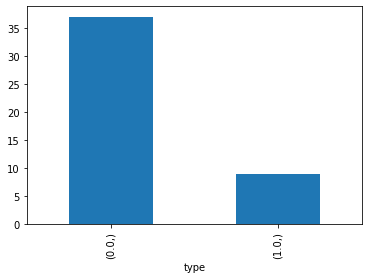

In [13]:
y.value_counts().plot(kind="bar")

# work with features as full data & classes or target for it's output

In [227]:
kfold=KFold(n_splits=10, random_state=42, shuffle=True)

# GridSearch Implementation 

## Knn

In [228]:
kn_classifier = KNeighborsClassifier()

In [229]:
param_grid_kn = {   
    'n_neighbors':[1,3,5,7,9,11,13,15],
    'weights':['uniform','distance'],
    'leaf_size':[10,30,],
}

In [230]:
kn_tuned =GridSearchCV(kn_classifier,param_grid=param_grid_kn, cv=kfold, verbose=2, n_jobs=4,scoring ="accuracy")

In [231]:
kn_tuned.fit(X, y.values.ravel())

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'leaf_size': [10, 30],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [232]:
print(kn_tuned.best_score_)
print(kn_tuned.best_params_)

0.9099999999999999
{'leaf_size': 10, 'n_neighbors': 3, 'weights': 'uniform'}


## SVC

In [233]:
svc_classifier = SVC()

In [234]:
param_grid_svm = {
    'C': [1,5,10,15,20,.1,30],
    'gamma': [ 'scale','auto'],
    'kernel': ['rbf','linear'],
}

In [235]:
svc_tuned =GridSearchCV(svc_classifier,param_grid=param_grid_svm,verbose=2, n_jobs=4,cv=kfold,scoring ="accuracy" )

In [236]:
svc_tuned.fit(X,  y.values.ravel())

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 5, 10, 15, 20, 0.1, 30],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [237]:
print(svc_tuned.best_score_)
print(svc_tuned.best_params_)

0.9349999999999999
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


# RF

In [238]:
rf_classifier = RandomForestClassifier()

In [239]:
param_grid_rf = {
    'n_estimators': [20,40,60,80,],
    'max_depth':[1,3,5,'none'],
    'criterion':['gini','entropy',],
    'max_features':['sqrt','log2',],
    'random_state':[42],
}

In [240]:
rf_tuned = GridSearchCV(
    rf_classifier, param_grid=param_grid_rf, cv=kfold, verbose=2, n_jobs=4,scoring ="accuracy" )

In [241]:
rf_tuned.fit(X,  y.values.ravel())

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 'none'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [42]},
             scoring='accuracy', verbose=2)

In [242]:
print(rf_tuned.best_score_)
print(rf_tuned.best_params_)

0.885
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}


# Train Test Split :

**we trained the features split percentages (Train: 65%, Test: 35%)**

In [824]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42,)

## KNN

In [825]:
knn=KNeighborsClassifier()

In [826]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [827]:
knn.score(X_train, Y_train) #Train Score

0.896551724137931

In [828]:
KNNaccuracy=knn.score(X_test, Y_test) #Test Score
KNNaccuracy

0.8235294117647058

In [829]:
from sklearn.metrics import classification_report
y_pred=knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        13
         1.0       1.00      0.25      0.40         4

    accuracy                           0.82        17
   macro avg       0.91      0.62      0.65        17
weighted avg       0.86      0.82      0.78        17



## svm

In [830]:
svc =SVC()

In [831]:
svc.fit(X_train,Y_train)

SVC()

In [832]:
svc.score(X_train, Y_train) #Train Score

0.8275862068965517

In [833]:
SVCaccuracy=svc.score(X_test, Y_test) #Test Score
SVCaccuracy

0.7647058823529411

In [834]:
from sklearn.metrics import classification_report
y_pred=svc.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        13
         1.0       0.00      0.00      0.00         4

    accuracy                           0.76        17
   macro avg       0.38      0.50      0.43        17
weighted avg       0.58      0.76      0.66        17



## RF

In [835]:
rf =RandomForestClassifier()

In [836]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [837]:
rf.score(X_train, Y_train) #Train Score

1.0

In [838]:
RFaccuracy=rf.score(X_test, Y_test) #Test Score
RFaccuracy

0.8235294117647058

In [839]:
from sklearn.metrics import classification_report
y_pred=rf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        13
         1.0       1.00      0.25      0.40         4

    accuracy                           0.82        17
   macro avg       0.91      0.62      0.65        17
weighted avg       0.86      0.82      0.78        17



### Before Feature Selection and Parameters Tuning

[(0.0, 100.0)]

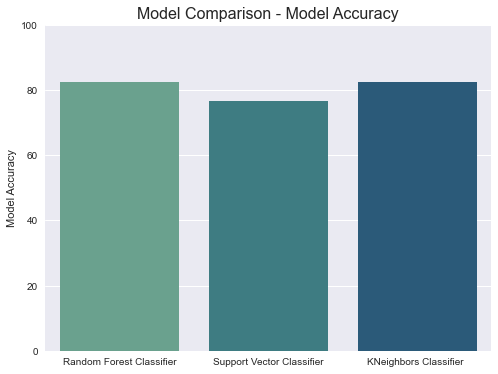

In [840]:
plt.style.use("seaborn")

l1 = ["Random Forest Classifier",  
     "Support Vector Classifier","KNeighbors Classifier "]

v1 = [RFaccuracy*100, 
     SVCaccuracy*100,
     KNNaccuracy*100,]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=l1,y=v1, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))

# Feature selection Code :

In [858]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select=SelectKBest(chi2, k=15000)
X_train_selected = select.fit_transform(X_train, Y_train)
X_test_selected= select.transform(X_test)

# Evalutaed models

### Random Forest

In [859]:
rf_evalutaed =RandomForestClassifier(**rf_tuned.best_params_)

In [860]:
rf_evalutaed.fit(X_train_selected,Y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [861]:
rf_evalutaed.score(X_train_selected, Y_train) #Train Score

1.0

In [862]:
RFTaccuracy=rf_evalutaed.score(X_test_selected, Y_test) #Test Score
RFTaccuracy

0.7647058823529411

In [863]:
from sklearn.metrics import classification_report
y_pred=rf_evalutaed.predict(X_test_selected)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.87        13
         1.0       0.00      0.00      0.00         4

    accuracy                           0.76        17
   macro avg       0.38      0.50      0.43        17
weighted avg       0.58      0.76      0.66        17



### SVC

In [864]:
svc_evalutaed =SVC(**svc_tuned.best_params_)

In [865]:
svc_evalutaed.fit(X_train_selected,Y_train)

SVC(C=1, kernel='linear')

In [866]:
svc_evalutaed.score(X_train_selected, Y_train) #Train Score

1.0

In [867]:
SVCTaccuracy=svc_evalutaed.score(X_test_selected, Y_test) #Test Score
SVCTaccuracy

0.9411764705882353

In [868]:
from sklearn.metrics import classification_report
y_pred=svc_evalutaed.predict(X_test_selected)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[12  1]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.80      1.00      0.89         4

    accuracy                           0.94        17
   macro avg       0.90      0.96      0.92        17
weighted avg       0.95      0.94      0.94        17



### KNeighbors

In [869]:
knn_evalutae=KNeighborsClassifier(**kn_tuned.best_params_)

In [870]:
knn_evalutae.fit(X_train_selected,Y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=3)

In [871]:
knn_evalutae.score(X_train_selected, Y_train) #Train Score

1.0

In [872]:
KNNTaccuracy=knn_evalutae.score(X_test_selected, Y_test) #Test Score
KNNTaccuracy

0.8823529411764706

In [873]:
from sklearn.metrics import classification_report
y_pred=knn_evalutae.predict(X_test_selected)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        13
         1.0       0.75      0.75      0.75         4

    accuracy                           0.88        17
   macro avg       0.84      0.84      0.84        17
weighted avg       0.88      0.88      0.88        17



## After Feature Selection

[(0.0, 100.0)]

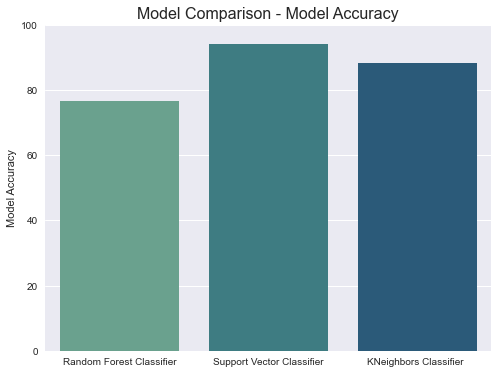

In [874]:
plt.style.use("seaborn")

l2 = ["Random Forest Classifier",  
     "Support Vector Classifier","KNeighbors Classifier "]

v2 = [RFTaccuracy*100, 
     SVCTaccuracy*100,
     KNNTaccuracy*100,]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=l2,y=v2, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))

In [875]:
from joblib import dump

dump(svc_evalutaed, './luekemia_cancer_svc.joblib')
Y_test=Y_test.replace({0: 'JMML', 1: 'Normal'})
pd.DataFrame(Y_test).to_csv('luekemia_result.csv',)
pd.DataFrame(X_test_selected).to_csv('luekemia_test.csv',)